In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Binarizando os valores da coluna 'Sex'
def transformar_sexo(valor):
    """Converte 'female' para 1 e 'male' para 0."""

    if valor == 'female':
        return 1
    else:
        return 0
    
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Aplicando a transformação nos datasets de treino e teste
train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [3]:
# Variaveis adicionais (porto de embarque)
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

# Variavel adicional (cabine nula)
train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

# Variaveis adicionais (titulos nos nomes)
train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)
train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr.').astype(int)

# Mesma coisa para o conjunto de teste
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)
test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr.").astype(int)

In [4]:
# Lista final de features
variaveis = [
             'Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare',
             'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr'
             ]

# Preenche valores ausentes (NaN) com -1 para serem tratadas de forma diferente
X = train[variaveis].fillna(-1)
y = train['Survived']

print('Features de treino (X):')
print(X.head())

Features de treino (X):
   Sex_binario   Age  Pclass  SibSp  Parch     Fare  Embarked_S  Embarked_C  \
0            0  22.0       3      1      0   7.2500           1           0   
1            1  38.0       1      1      0  71.2833           0           1   
2            1  26.0       3      0      0   7.9250           1           0   
3            1  35.0       1      1      0  53.1000           1           0   
4            0  35.0       3      0      0   8.0500           1           0   

   Cabine_nula  Nome_contem_Miss  Nome_contem_Mrs  Nome_contem_Master  \
0            1                 0                0                   0   
1            0                 0                1                   0   
2            1                 1                0                   0   
3            0                 0                1                   0   
4            1                 0                0                   0   

   Nome_contem_Col  Nome_contem_Major  Nome_contem_Mr  
0     


Iniciando validação cruzada...
Média da acurácia na validação cruzada: 0.8191


(array([2., 3., 3., 5., 1., 2., 2., 0., 0., 2.]),
 array([0.80224719, 0.80655162, 0.81085605, 0.81516048, 0.81946491,
        0.82376934, 0.82807376, 0.83237819, 0.83668262, 0.84098705,
        0.84529148]),
 <BarContainer object of 10 artists>)

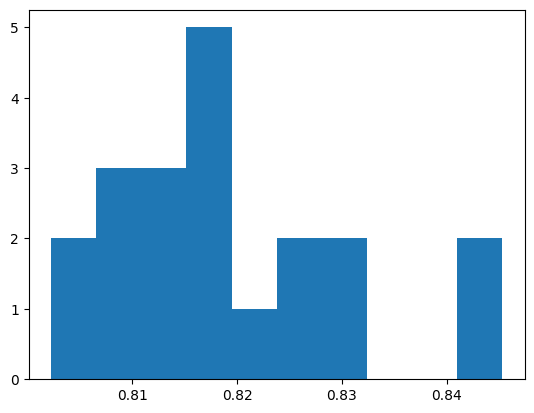

In [7]:
resultados = []

# Configuração da validação cruzada (2 splits, 10 repetições)
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

print('\nIniciando validação cruzada...')

# Loop de validação cruzada para treinar e avaliar o modelo
for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    # Escolha do modelo: Regressão Logística
    modelo = LogisticRegression(solver='liblinear', random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)

media_acuracia = np.mean(resultados)

print(f'Média da acurácia na validação cruzada: {media_acuracia:.4f}')
plt.hist(resultados)

In [8]:
print('\nTreinando modelo final...')
modelo_final = LogisticRegression(solver='liblinear', random_state=0)
modelo_final.fit(X, y)

# Prepara o conjunto de teste, garantindo o preenchimento de NaN
X_teste_features = test[variaveis].fillna(-1)

previsoes = modelo_final.predict(X_teste_features)
print('\nPrevisões no conjunto de teste:')
print(previsoes)


Treinando modelo final...

Previsões no conjunto de teste:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [9]:
# Cria uma Series com as previsões (p) e o PassengerId como índice
submissao = pd.Series(previsoes, index=test['PassengerId'], name='Survived')

nome_arquivo_submissao = 'modelo_titanic.csv'
submissao.to_csv(nome_arquivo_submissao, header=True)

print(f'\nArquivo de submissão "{nome_arquivo_submissao}" criado com sucesso.')


Arquivo de submissão "modelo_titanic.csv" criado com sucesso.
